
Dataset: OwnDoc

Missing Values:
 date                    0
ProdTulips              0
SoldTulips              0
WholesaleTulips         0
mean_temp               0
mean_humid              0
mean_prec_height_mm     0
total_prec_height_mm    0
mean_prec_flag          0
total_prec_flag         0
mean_sun_dur_min        0
total_sun_dur_h         0
public_holiday          0
school_holiday          0
day_of_week             0
month                   0
is_weekend              0
dtype: int64

Data Types:
 date                    datetime64[ns]
ProdTulips                     float64
SoldTulips                     float64
WholesaleTulips                float64
mean_temp                      float64
mean_humid                     float64
mean_prec_height_mm            float64
total_prec_height_mm           float64
mean_prec_flag                 float64
total_prec_flag                float64
mean_sun_dur_min               float64
total_sun_dur_h                float64
public_holiday              

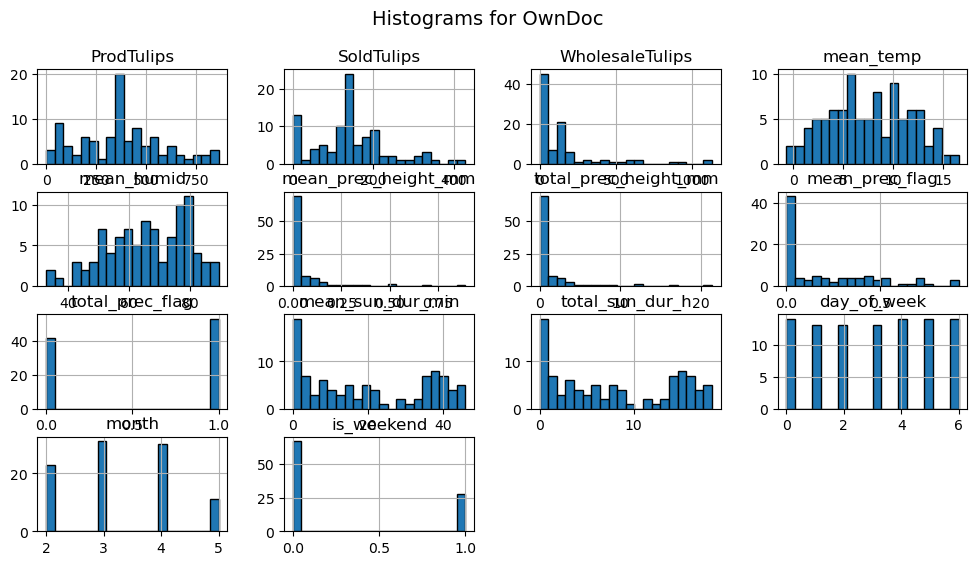


Dataset: CashierData

Missing Values:
 date                    0
CutFlowers              0
PotOwn                  0
PotPurchased            0
Wholesale               0
FruitsVegs              0
Commodity               0
mean_temp               0
mean_humid              0
mean_prec_height_mm     0
total_prec_height_mm    0
mean_prec_flag          0
total_prec_flag         0
mean_sun_dur_min        0
total_sun_dur_h         0
public_holiday          0
school_holiday          0
day_of_week             0
month                   0
is_weekend              0
dtype: int64

Data Types:
 date                    datetime64[ns]
CutFlowers                     float64
PotOwn                         float64
PotPurchased                   float64
Wholesale                      float64
FruitsVegs                     float64
Commodity                      float64
mean_temp                      float64
mean_humid                     float64
mean_prec_height_mm            float64
total_prec_height_mm   

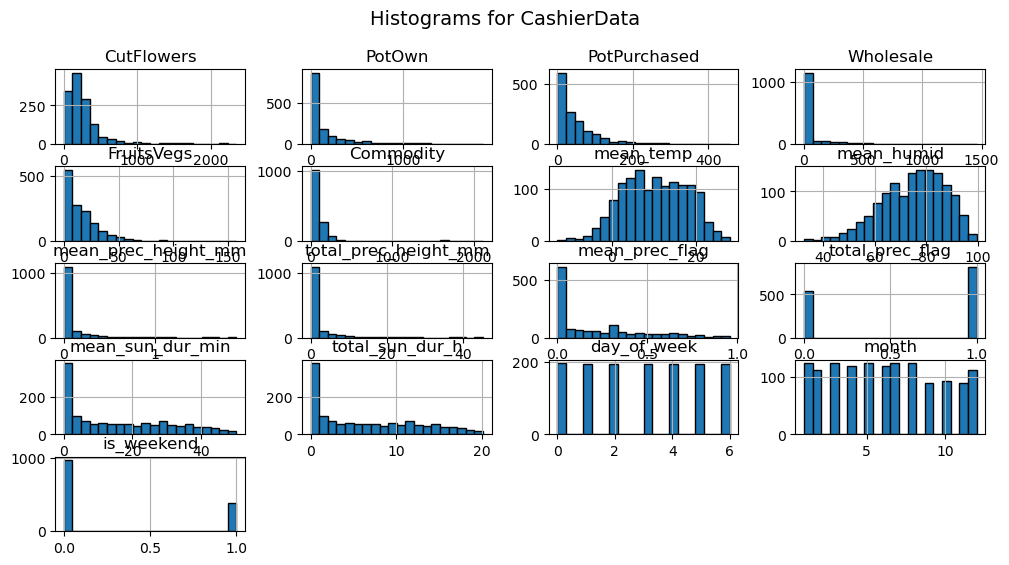

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

def check_dataset_info(df, name):
    """Check for null values, data types, duplicate values, and plot histograms."""
    print(f"\n{'='*30}\nDataset: {name}\n{'='*30}")
    
    # Check for null values
    print("\nMissing Values:\n", df.isnull().sum())
    
    # Check data types
    print("\nData Types:\n", df.dtypes)
    
    # Check for duplicates
    print("\nDuplicate Rows:", df.duplicated().sum())
    
    # Drop duplicates
    df = df.drop_duplicates()
    print("\nAfter Removing Duplicates, Shape:", df.shape)
    
    # Plot histograms
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols].hist(figsize=(12, 6), bins=20, edgecolor='black')
    plt.suptitle(f"Histograms for {name}", fontsize=14)
    plt.show()
    
    return df

def preprocess_owndoc(file_path):
    """Preprocess OwnDoc dataset: handle missing values, convert formats, and engineer features."""
    df = pd.read_csv(file_path, delimiter=';', decimal=',')
    df.columns = df.columns.str.strip()
    df.rename(columns={'Date': 'date'}, inplace=True)
    df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
    bool_cols = df.select_dtypes(include=['bool']).columns
    df[bool_cols] = df[bool_cols].astype(int)
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    return check_dataset_info(df, "OwnDoc")

def preprocess_cashierdata(file_path):
    """Preprocess CashierData dataset: handle missing values, convert formats, and engineer features."""
    df = pd.read_csv(file_path, delimiter=';', decimal=',')
    df.columns = df.columns.str.strip()
    df.rename(columns={'Date': 'date'}, inplace=True)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    bool_cols = df.select_dtypes(include=['bool']).columns
    df[bool_cols] = df[bool_cols].astype(int)
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    return check_dataset_info(df, "CashierData")


df_own = preprocess_owndoc("OwnDoc.csv")
df_cashier = preprocess_cashierdata("CashierData.csv")
